# Decison Trees

First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree #we will use the decision tree machine learning based on historical data

input_file = "C:/Users/Owner/MLCourse/PastHires.csv"
df = pd.read_csv(input_file, header = 0)


In [2]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

In [3]:
d = {'Y': 1, 'N': 0}  #convert all the Y to 1 and all the N  to 0

df['Hired'] = df['Hired'].map(d)  #go to the entire column hired and use that dictionary (d) to transform all the values of that column

df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

d = {'BS': 0, 'MS': 1, 'PhD': 2} #even for that we assign Ms to 1 Bs to 0 and Phd to 2

df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [4]:
features = list(df.columns[:6]) #we take the features that we want to use for the prediction
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

It should be mentioned that the feature extraction and ranking the functions such as ExtraTreesClassifier for classification and ExtraTreesRegressor for regression in Python/sklearn.ensemble [14], can be used for the feature ranking and directly generate the sorted features


Now actually construct the decision tree:

In [5]:
y = df["Hired"] #and this is the target column that we want to predict
X = df[features] #we use as the x value the features

clf = tree.DecisionTreeClassifier() #create the classifier 
clf = clf.fit(X,y) #fit it to the data

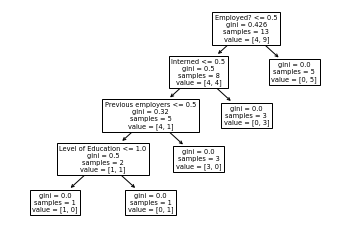

In [6]:
#one way to plot 
import matplotlib.pyplot as plt

tree.plot_tree(clf, feature_names=features)
plt.show()

... and display it. Note you need to have pydotplus installed for this to work. (!pip install pydotplus)

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

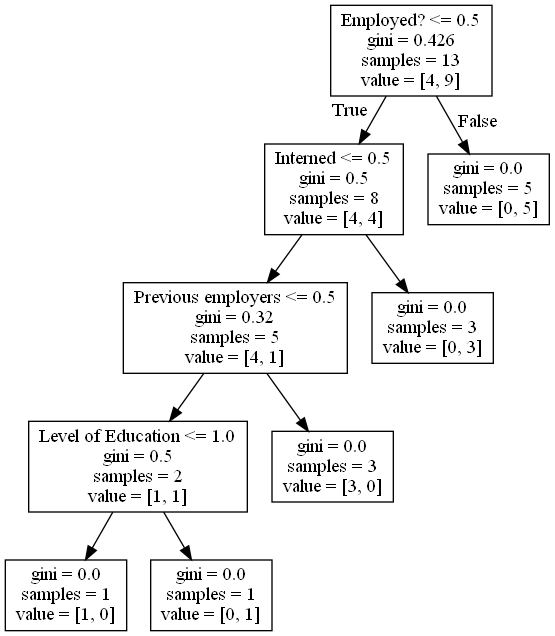

In [7]:
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from six import StringIO

import pydotplus

#another way to plot the tree but we need to create an att folder on progarm files add the Graphviz folder there and add to the Windows PATH: C:\Program Files\att\Graphviz\bin

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## Ensemble learning: using a random forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [8]:
from sklearn.ensemble import RandomForestClassifier

#create a random forest classifier which takes many decisions trees that had been created with different samples of data for training and find the one with the best entropy score

clf = RandomForestClassifier(n_estimators=10) #we take 10 trees
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))   #this will output most of the times 1

#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]])) #this will output most of the times 0

#but we can raise the decision trees for better results if we want

[1]
[0]


## Activity

Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decision tree to the one from the original data.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from inspect import signature
import sklearn.metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import recall_score

y_pred = clf.predict(X)


In [29]:
accuracy_score(y, y_pred)

0.9230769230769231

In [30]:
precision_score(y, y_pred,zero_division="warn")

0.9

In [31]:
f1_score(y, y_pred)

0.9473684210526316

In [32]:
sklearn.metrics.cohen_kappa_score(y, y_pred)

0.8059701492537313

In [33]:
recall_score(y,y_pred)

1.0